# Simple Linear Regression

In [2]:
## import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
## Read the dataset
df = pd.read_csv('height-weight.csv')
df.head()

,Weight,Height
0,45,120
1,58,135
2,48,123
3,60,145
4,70,160


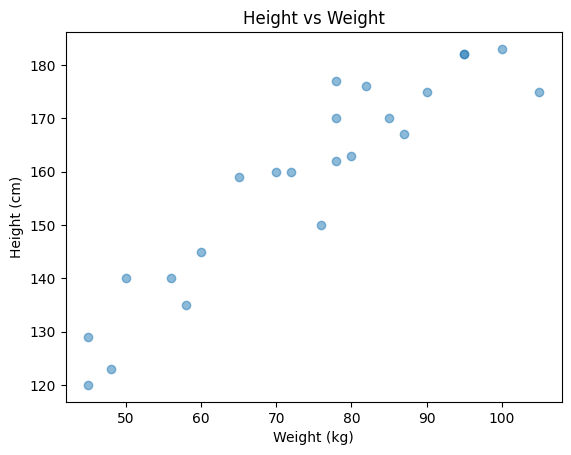

In [4]:
plt.scatter( df['Weight'], df['Height'], alpha=0.5)
plt.xlabel('Weight (kg)')
plt.ylabel('Height (cm)')
plt.title('Height vs Weight')
plt.show()

In [5]:
## Divide our dataset into independet and dependet features
X = df['Weight'] ## INDEPDENT FEATURES
y = df['Height'] # dedepender features

In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [7]:
X.shape, y.shape

((23,), (23,))

In [8]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((18,), (5,), (18,), (5,))

In [9]:
X_train

12    105
1      58
13    100
5      78
2      48
11     95
20     45
3      60
4      70
18     76
16     50
21     56
22     72
7      90
10     82
14     85
19     87
6      80
Name: Weight, dtype: int64

In [10]:
## Standardize the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train.values.reshape(-1, 1))
X_test = scaler.transform(X_test.values.reshape(-1, 1))

In [11]:
X_train

array([[ 1.73689094],
       [-0.92026952],
       [ 1.4542143 ],
       [ 0.21043706],
       [-1.48562281],
       [ 1.17153765],
       [-1.6552288 ],
       [-0.80719886],
       [-0.24184557],
       [ 0.0973664 ],
       [-1.37255215],
       [-1.03334018],
       [-0.12877492],
       [ 0.88886101],
       [ 0.43657837],
       [ 0.60618436],
       [ 0.71925502],
       [ 0.32350772]])

In [12]:
X_test

array([[ 0.21043706],
       [ 0.21043706],
       [-1.6552288 ],
       [ 1.17153765],
       [-0.52452222]])

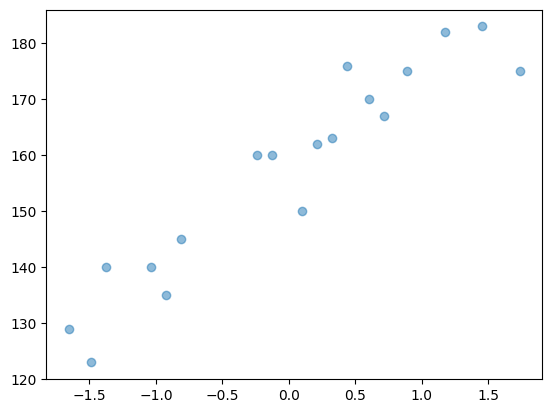

In [13]:
plt.scatter(X_train, y_train, alpha=0.5, label='Train Data')

In [14]:
# train the simple Linear Regression
from sklearn.linear_model import LinearRegression
regression = LinearRegression()

In [15]:
regression.fit(X_train, y_train)

LinearRegression()

In [16]:
regression.coef_, regression.intercept_

(array([17.03440872]), 157.5)

In [17]:
print('The slope or coefficiente of weight is: ', regression.coef_)
print('The intercept is: ', regression.intercept_)

The slope or coefficiente of weight is:  [17.03440872]
The intercept is:  157.5


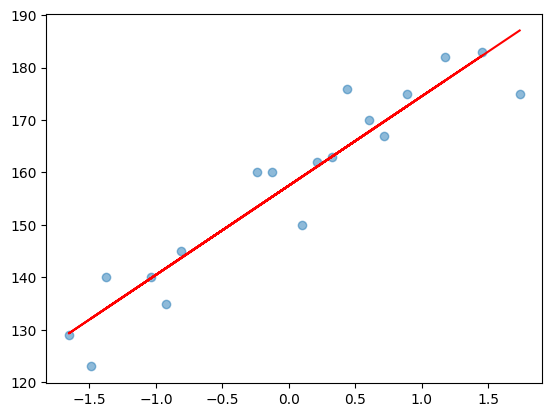

In [19]:
plt.scatter(X_train, y_train, alpha=0.5, label='Train Data')
plt.plot(X_train, regression.predict(X_train), color='red', label='Regression Line')

In [ ]:
## Prediction of train data
## 1. Predict the height of a person  = intercetp + coeff(weight)
## y_pred_train = 1575.4 + 17.03

# Prediciton of test data
## 1.Predicted height ouput = intercept + 

In [20]:
y_pred_test = regression.predict(X_test)

In [21]:
y_pred_test,y_test

(array([161.08467086, 161.08467086, 129.3041561 , 177.45645118,
        148.56507414]),
 15    177
 9     170
 0     120
 8     182
 17    159
 Name: Height, dtype: int64)

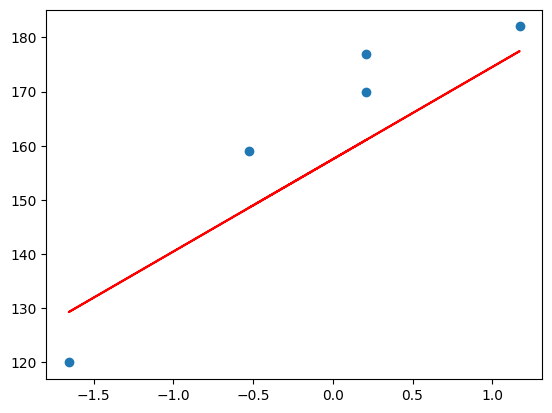

In [23]:
plt.scatter(X_test,y_test)
plt.plot(X_test, regression.predict(X_test), color='red', label='Regression Line')

## Performance Metrics
## MSE,MAE,RMSE
## r squared and adjusted r squaredm

In [24]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [25]:
## mse 
mse = mean_squared_error(y_test, y_pred_test)
print('Mean Squared Error:', mse)
mae = mean_absolute_error(y_test, y_pred_test)
print('Mean Absolute Error:', mae)
rmse = np.sqrt(mse)
print('Root Mean Squared Error:', rmse)

Mean Squared Error: 109.77592599051664
Mean Absolute Error: 9.822657814519232
Root Mean Squared Error: 10.477400726827081


R-squared: 0.776986986042344


Text(0.5, 1.0, 'Residuals vs Predicted Height')

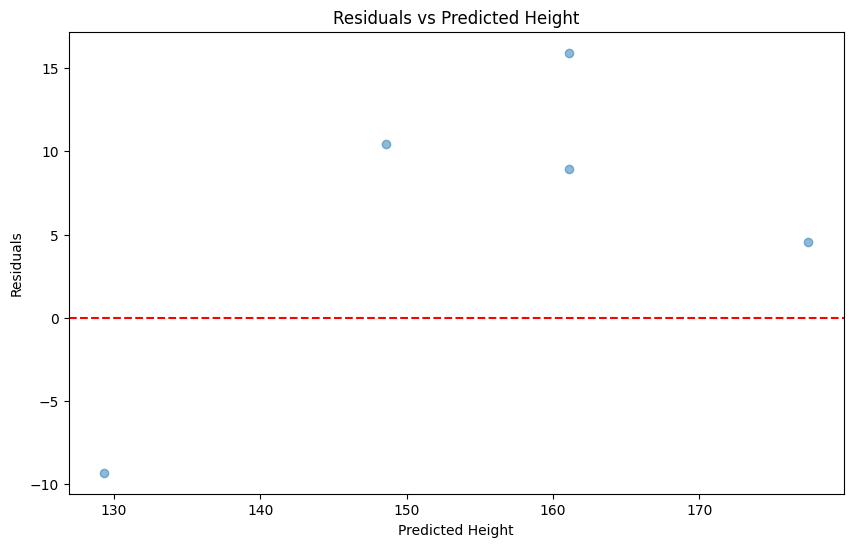

In [26]:
score = r2_score(y_test, y_pred_test)
print('R-squared:', score)
## Plotting the residuals
residuals = y_test - y_pred_test
plt.figure(figsize=(10, 6))
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Height')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Height')

In [27]:
regression

LinearRegression()

In [30]:
## new data point
scale_weight = scaler.transform([[80]])
scale_weight

array([[0.32350772]])

In [31]:
regression.predict(scale_weight)

array([163.01076266])

In [32]:
scale_weight

array([[0.32350772]])

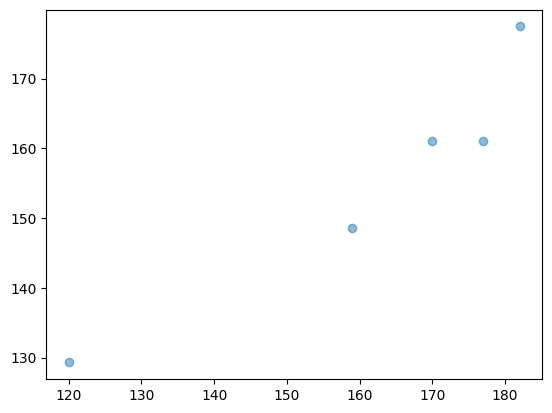

In [34]:
## Assumptions
## plot a scatter plot for the precdition
plt.scatter(y_test, y_pred_test, alpha=0.5)

In [35]:
## Residual's
residuals = y_test - y_pred_test
residuals


15    15.915329
9      8.915329
0     -9.304156
8      4.543549
17    10.434926
Name: Height, dtype: float64

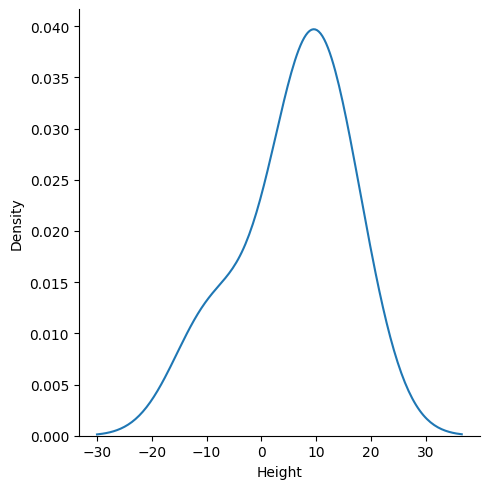

In [40]:
sns.displot(residuals, kind='kde')

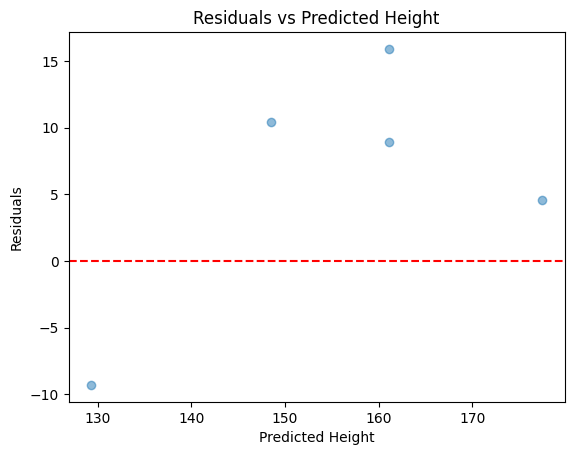

In [41]:
plt.scatter(y_pred_test, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Predicted Height')
plt.ylabel('Residuals')
plt.title('Residuals vs Predicted Height')
plt.show()


## Multiple Linear Regression

In [ ]:
from sklearn.datasets import fetch_california_housing

california = fetch_california_housing()
california_df = pd.DataFrame(california.data, columns=california.feature_names)